# Exploring Patient Recovery Times with Antigranular: A Differentially Private Approach with Synthetic Data 🦾
In this notebook, we explore synthetic patient data, focusing on recovery times following medical treatments. 🩺 Our goal is to uncover patterns and relationships within the data while preserving the privacy of potential individuals represented in the dataset. To achieve this, we utilise the Antigranular platform, which provides tools for differentially private data analysis. 😎

### Getting Started: Install, Import & Connect to Antigranular 💥
The first step is to make sure we have Antigranular installed. Antigranular is a Python package that helps us work with data while maintaining privacy of individuals. 🤫

In [ ]:
!pip install antigranular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.0 MB/s eta 0:00:00


In [ ]:
import antigranular as ag
session = ag.login(<client_id>, <client_secret>, dataset = "Adult Population Dataset")

Loading dataset "Adult Population Dataset" to the kernel...
Dataset "Adult Population Dataset" loaded to the kernel as adult_population_dataset
Connected to Antigranular server session id: 1029098b-0709-4859-bdff-be359a7e73bc, the session will time out if idle for 60 minutes
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server
🚀 Everything's set up and ready to roll!


### Importing Necessary Libraries 📚
Python has a rich ecosystem of libraries that make it easier to work with data. We import Pandas for data manipulation, Numpy for numerical operations, and other libraries as needed.

In [ ]:
import pandas as pd
import numpy as np

### Generating Synthetic Data 💿
Here, we're creating a fake dataset to simulate patient recovery times. We use functions like `np.random.randint` and `np.random.choice` to generate random numbers and selections. We will use the synthetic data thus created to do our analysis.

In [ ]:
np.random.seed(0)  # Seed for reproducibility
n = 1000

# Generate ages uniformly between 18 and 90
ages = np.random.randint(18, 90, size=n)

# Treatment types, where 'A' is more effective than 'B'
treatments = np.random.choice(['A', 'B'], size=n)
# Bias for treatment effect: 'A' decreases recovery time by 5 days, 'B' increases by 3 days
treatment_effects = {'A': -5, 'B': 3}
treatment_effect = np.vectorize(treatment_effects.get)(treatments)

# Preexisting conditions, where having a condition increases recovery time
preexisting_conditions = np.random.choice([0, 1], size=n)  # 0 for no conditions, 1 for conditions
# Bias for preexisting conditions effect: having a condition increases recovery time by 7 days
condition_effect = preexisting_conditions * 7

# Base recovery time influenced by age
base_recovery_time = 30
age_effect = 0.2 * (ages - 50)  # Recovery time increases slightly with age over 50

# Calculate recovery times as base recovery time plus effects of age, treatment, and conditions
recovery_times = base_recovery_time + age_effect + treatment_effect + condition_effect

# Add some random Gaussian noise to recovery times
recovery_noise = np.random.normal(loc=0, scale=5, size=n)
recovery_times += recovery_noise

# Create DataFrame
df = pd.DataFrame({
    'Age': ages,
    'Treatment_Type': treatments,
    'Preexisting_Conditions': preexisting_conditions,
    'Recovery_Time': recovery_times
})


### Importing the Data to Antigranular 🚀
Once we have our synthetic data ready, we need to bring it into the Antigranular environment so we can work on it securely. The session.`private_import` function is used for this purpose.

In [ ]:
session.private_import(data=df, name='df')

dataframe cached to server, loading to kernel...


### Creating a PrivateDataFrame 🙈
In Antigranular, we use a special kind of DataFrame called PrivateDataFrame. It's like a regular Pandas DataFrame but is designed to protect privacy when performing calculations.

In [ ]:
%%ag
from op_pandas import PrivateDataFrame
pdf = PrivateDataFrame(df)

Dataframe loaded successfully to the kernel



### Describing the Data 🤝🏼
We use the `.describe` method to get an overview of the synthetic data we created. This includes counts, means, standard deviations, and other statistical measures.

In [ ]:
%%ag
ag_print(pdf.describe(eps=0.1))

               Age  Preexisting_Conditions  Recovery_Time
count  1072.000000             1072.000000    1072.000000
mean     53.583819                0.610502      27.684456
std      21.213569                0.253166      13.625793
min      18.000000                0.000000       4.079378
25%      39.692994                0.040965      35.806126
50%      40.999619                0.567916      44.175708
75%      75.641305                0.054811      20.501882
max      27.181176                0.997517      32.534884



### Hypothesis Testing 🧐
Now, let's propose a hypothesis about our data, for example, whether people under 50 have a lower recovery time than those over 50. To test this, we compare the mean recovery times for different age groups using Antigranular's privacy-preserving methods.



In [ ]:
%%ag
# Calculate the differentially private mean recovery time for people over and under 50
mean_over_50 = pdf.where(pdf['Age'] > 50)["Recovery_Time"].mean(eps=0.05)
mean_under_50 = pdf.where(pdf['Age'] < 50)["Recovery_Time"].mean(eps=0.05)

# Print the results
ag_print(f"Differentially Private Mean recovery time for people over 50: {mean_over_50}")
ag_print(f"Differentially Private Mean recovery time for people under 50: {mean_under_50}")

# Compare the means and print the conclusion of the hypothesis test
if mean_under_50 < mean_over_50:
    ag_print("The mean recovery time for people under 50 is less than those over 50")
else:
    ag_print("The mean recovery time for people under 50 is not less than those over 50")


Differentially Private Mean recovery time for people over 50: 35.6468066596604
Differentially Private Mean recovery time for people under 50: 28.415477700925113
The mean recovery time for people under 50 is less than those over 50



Our hypothesis seems valid. In the realm of differential privacy, hypothesis testing is not just about comparing means or proportions; it's about balancing the trade-off between the accuracy of the results and the privacy of the individuals in the dataset. The use of differential privacy introduces some level of uncertainty to protect individual data points, which is achieved by adding controlled noise to the data.🌪️

In our specific case, we have conducted a hypothesis test to compare the mean recovery times for individuals under and over the age of 50. The results from this test are differentially private, which means they are approximate and not exact values. 👀 The added noise can influence the outcome, especially when working with small differences and tight privacy budgets. 🤑

### Visualising Trends 📊
Noe, let's import the necessary libraries for plotting.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

### Exploring Interaction Effects 🤔
Sometimes, we want to explore how two factors together affect an outcome. For instance, we may look at how age and treatment taken together influence recovery time. We calculate differentially private means for different subgroups and then plot these to see the interaction effects.

In [ ]:
%%ag
# Define age brackets
age_brackets = {'<30': (0, 29), '30-50': (30, 50), '>50': (51, 100)}

# Initialize a dictionary to store results
dp_mean_recovery_by_age = {}

# Loop over each bracket to calculate differentially private means
for label, (age_min, age_max) in age_brackets.items():
    age_bracket_mask = (pdf['Age'] >= age_min) & (pdf['Age'] <= age_max)
    dp_mean_recovery_by_age[label] = {
        'A': pdf.where(age_bracket_mask & (pdf['Treatment_Type'] == 'A'))['Recovery_Time'].mean(eps=0.1),
        'B': pdf.where(age_bracket_mask & (pdf['Treatment_Type'] == 'B'))['Recovery_Time'].mean(eps=0.1)
    }


export(dp_mean_recovery_by_age, 'dp_mean_recovery_by_age')


Setting up exported variable in local environment: dp_mean_recovery_by_age


Here, we are plotting the exported data in local environment.

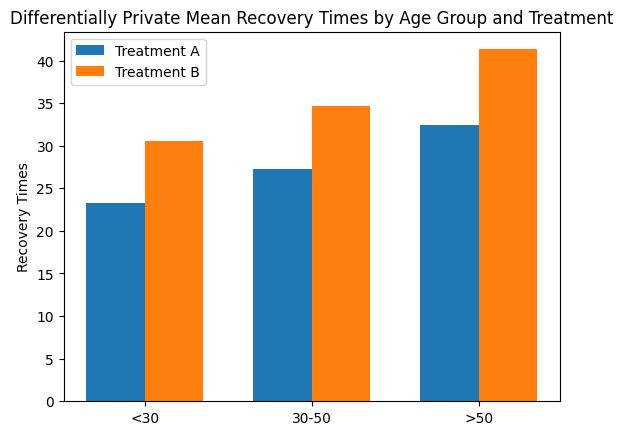

In [ ]:
# Visualize the results
labels, mean_rec_A, mean_rec_B = zip(*[(label, data['A'], data['B']) for label, data in dp_mean_recovery_by_age.items()])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mean_rec_A, width, label='Treatment A')
rects2 = ax.bar(x + width/2, mean_rec_B, width, label='Treatment B')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Recovery Times')
ax.set_title('Differentially Private Mean Recovery Times by Age Group and Treatment')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

We can see that the recovery time increases with age, exactly what we observed in the initial hypothesis testing. Another interesting observation is that the type of treatment affects recovery time. 🤕 **Treatment A** seems to be more effective for all age groups as it reduces recovery time across all age groups. 🎉

We're not done yet! Now, let's look at how treatment taken and preexisting conditions together influence recovery time.

In [ ]:
%%ag
# Constants for differential privacy budget allocation
epsilon_per_query = 0.1  # Adjust this value based on your total epsilon budget

# Initialize a dictionary to store results
dp_mean_recovery_by_condition = {'A': {}, 'B': {}}

# Calculate differentially private means for each treatment and condition status
for treatment in ['A', 'B']:
    for condition_status in [0, 1]:  # Assuming 0 for no conditions, 1 for preexisting conditions
        condition_mask = pdf['Preexisting_Conditions'] == condition_status
        treatment_mask = pdf['Treatment_Type'] == treatment
        dp_mean_recovery_by_condition[treatment][condition_status] = pdf.where(condition_mask & treatment_mask)['Recovery_Time'].mean(eps=epsilon_per_query)

export(dp_mean_recovery_by_condition, 'dp_mean_recovery_by_condition')

Setting up exported variable in local environment: dp_mean_recovery_by_condition


Let's Plot the exported data in local environment

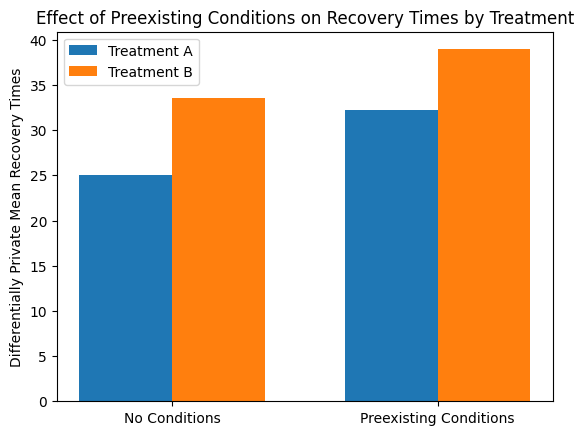

In [ ]:
# Data for plotting
conditions = ['No Conditions', 'Preexisting Conditions']
mean_rec_A = [dp_mean_recovery_by_condition['A'][0], dp_mean_recovery_by_condition['A'][1]]
mean_rec_B = [dp_mean_recovery_by_condition['B'][0], dp_mean_recovery_by_condition['B'][1]]

x = np.arange(len(conditions))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mean_rec_A, width, label='Treatment A')
rects2 = ax.bar(x + width/2, mean_rec_B, width, label='Treatment B')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Differentially Private Mean Recovery Times')
ax.set_title('Effect of Preexisting Conditions on Recovery Times by Treatment')
ax.set_xticks(x)
ax.set_xticklabels(conditions)
ax.legend()

plt.show()

Here, we can see that for the population in the given dataset, people with pre-existing conditions tend to spend more time in recovery, whether they took treatment A or B. It also shows again that treatment A is more effective whether they have pre-existing conditions or not. ✔️

Finally, let's look at how age and preexisting conditions together influence recovery time.

In [ ]:
%%ag
# Define age brackets
age_brackets = {
    'Under 30': (0, 29),
    '30-50': (30, 50),
    'Over 50': (51, 100)
}

# Initialize a dictionary to store the results
dp_mean_recovery_by_age_condition = {
    'Under 30': {'With Conditions': None, 'Without Conditions': None},
    '30-50': {'With Conditions': None, 'Without Conditions': None},
    'Over 50': {'With Conditions': None, 'Without Conditions': None}
}

# Set a small epsilon for the privacy budget of each query
epsilon_per_query = 0.05  # Adjust based on your total epsilon budget

# Perform the differentially private mean recovery time calculation for each subgroup
for age_label, (age_min, age_max) in age_brackets.items():
    for condition_status, condition_label in zip([0, 1], ['Without Conditions', 'With Conditions']):
        # Create a mask for the age bracket and preexisting condition status
        age_mask = (pdf['Age'] >= age_min) & (pdf['Age'] <= age_max)
        condition_mask = pdf['Preexisting_Conditions'] == condition_status

        # Calculate the differentially private mean recovery time for the subgroup
        dp_mean_recovery_by_age_condition[age_label][condition_label] = pdf.where(age_mask & condition_mask)['Recovery_Time'].mean(eps=epsilon_per_query)

export(dp_mean_recovery_by_age_condition, 'dp_mean_recovery_by_age_condition')

Setting up exported variable in local environment: dp_mean_recovery_by_age_condition


Plotting the expoted data

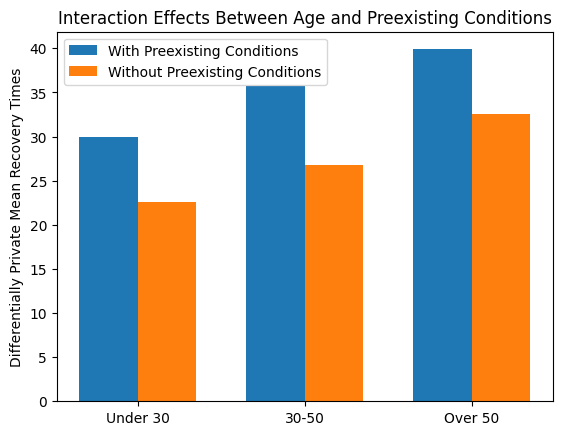

In [ ]:
# Prepare data for plotting
age_labels = dp_mean_recovery_by_age_condition.keys()
recovery_times_with_conditions = [dp_mean_recovery_by_age_condition[age]['With Conditions'] for age in age_labels]
recovery_times_without_conditions = [dp_mean_recovery_by_age_condition[age]['Without Conditions'] for age in age_labels]

x = np.arange(len(age_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, recovery_times_with_conditions, width, label='With Preexisting Conditions')
rects2 = ax.bar(x + width/2, recovery_times_without_conditions, width, label='Without Preexisting Conditions')

# Add labels and title
ax.set_ylabel('Differentially Private Mean Recovery Times')
ax.set_title('Interaction Effects Between Age and Preexisting Conditions')
ax.set_xticks(x)
ax.set_xticklabels(age_labels)
ax.legend()

plt.show()

This plot hints that the people without pre-existing conditions spend less time in recovery across all age groups as well. 🥳

### Taking a Look at the Original Data 🤗
Now that we have extracted some insights out of our `PrivateDataFrame`, let's take a look at what our original synthetic data broadly looked like.

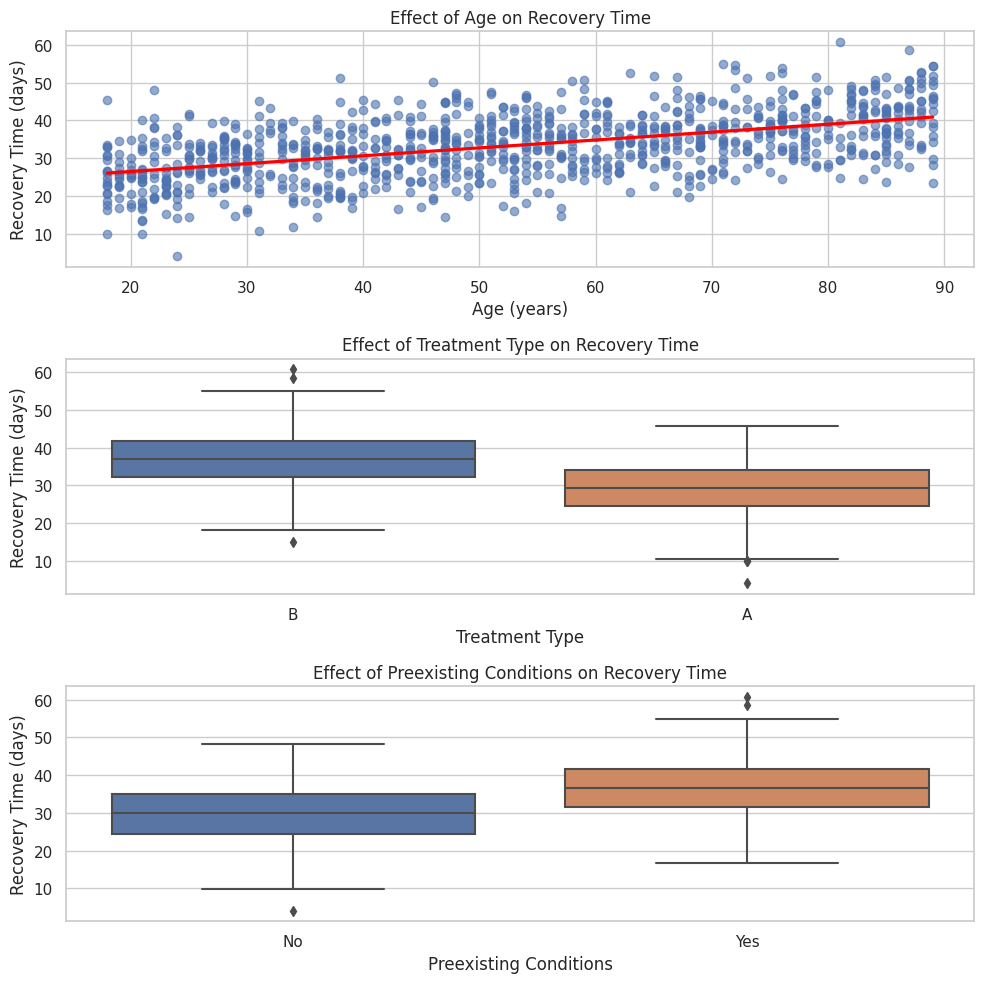

In [ ]:
# Setting the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Create a figure with subplots - 3 rows, 1 column
fig, axes = plt.subplots(3, 1, figsize=(10, 10))

# Plot 1: Recovery Time by Age
# Scatter plot with a regression line to show the effect of age on recovery time
sns.regplot(ax=axes[0], x='Age', y='Recovery_Time', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
axes[0].set_title('Effect of Age on Recovery Time')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Recovery Time (days)')

# Plot 2: Recovery Time by Treatment Type
# Box plot to show the effect of treatment type on recovery time
sns.boxplot(ax=axes[1], x='Treatment_Type', y='Recovery_Time', data=df)
axes[1].set_title('Effect of Treatment Type on Recovery Time')
axes[1].set_xlabel('Treatment Type')
axes[1].set_ylabel('Recovery Time (days)')

# Plot 3: Recovery Time by Preexisting Conditions
# Box plot to show the effect of preexisting conditions on recovery time
sns.boxplot(ax=axes[2], x='Preexisting_Conditions', y='Recovery_Time', data=df)
axes[2].set_title('Effect of Preexisting Conditions on Recovery Time')
axes[2].set_xlabel('Preexisting Conditions')
axes[2].set_ylabel('Recovery Time (days)')
axes[2].set_xticklabels(['No', 'Yes'])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Conclusion: Insights and Integrity in Privacy-Preserved Analysis 🙌🏽
Our journey through the synthetic dataset has yielded valuable insights, revealing trends and patterns within the recovery times of different patient groups. 💻

By comparing the means within different age groups and conditions, our differentially private hypothesis testing aligned with the broader trends observed in the actual synthetic data. 💡 This reaffirms the power and reliability of differential privacy techniques in extracting meaningful information without compromising individual data points. 💥